In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train.csv', encoding='latin-1')
#test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetsclassify\\testsentiment.csv')

print(train.shape)
#print(test.shape)

(99989, 3)


In [4]:
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
train.isnull().any()

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

In [8]:
# checking out the positive comments from the train set

train[train['Sentiment'] == 1].head(10)

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


In [9]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [11]:
train['normalized'] = train.SentimentText.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [23]:
train.tail(20)

,ItemID,Sentiment,SentimentText,normalized,normal
99966,99978,0,@ctb1221 yeah sorry.going to a concert that n...,"[go, concert, night, non, returnable, ticket]",go concert night non returnable ticket
99967,99979,1,@ctcash @buildingateam @diabetescure @chocolat...,"[spread, word]",spread word
99968,99980,1,@ctdesign87 im so glad you went to china town ...,"[glad, go, china, town, actually, think, birya...",glad go china town actually think biryani plac...
99970,99982,0,"@CTerry1985 damn it, dont have sky","[dont, sky]",dont sky
99971,99983,0,@CTerry1985 That's the thing; the new raft of ...,"[thing, new, raft, star, wars, film, raft]",thing new raft star wars film raft
99974,99986,0,@ctham #awaresg You are not wrong. But from a ...,"[wrong, male, point, view, felt, exclude, even...",wrong male point view felt exclude even non re...
99975,99987,0,@ctham @mommyfizz cuz you big burly man. haha...,"[big, burly, man, hahahahahahahahaha]",big burly man hahahahahahahahaha
99976,99988,1,@ctham @Wilsurn Trying to get a wider range of...,"[get, wider, range, shirt, suit, everyone, ple...",get wider range shirt suit everyone please mak...
99977,99989,1,@ctham Haha I love the passion in your support,"[love, passion, support]",love passion support
99978,99990,1,@cthulhullahoop That sucks...I like living in ...,"[like, live, coopersville, need, special, bag,...",like live coopersville need special bag anything


In [24]:
train['normal'].replace('', np.nan, inplace=True)
#train.tail(20)
train.dropna(subset=['normal'], inplace=True)
train.tail(20)

,ItemID,Sentiment,SentimentText,normalized,normal
99966,99978,0,@ctb1221 yeah sorry.going to a concert that n...,"[go, concert, night, non, returnable, ticket]",go concert night non returnable ticket
99967,99979,1,@ctcash @buildingateam @diabetescure @chocolat...,"[spread, word]",spread word
99968,99980,1,@ctdesign87 im so glad you went to china town ...,"[glad, go, china, town, actually, think, birya...",glad go china town actually think biryani plac...
99970,99982,0,"@CTerry1985 damn it, dont have sky","[dont, sky]",dont sky
99971,99983,0,@CTerry1985 That's the thing; the new raft of ...,"[thing, new, raft, star, wars, film, raft]",thing new raft star wars film raft
99974,99986,0,@ctham #awaresg You are not wrong. But from a ...,"[wrong, male, point, view, felt, exclude, even...",wrong male point view felt exclude even non re...
99975,99987,0,@ctham @mommyfizz cuz you big burly man. haha...,"[big, burly, man, hahahahahahahahaha]",big burly man hahahahahahahahaha
99976,99988,1,@ctham @Wilsurn Trying to get a wider range of...,"[get, wider, range, shirt, suit, everyone, ple...",get wider range shirt suit everyone please mak...
99977,99989,1,@ctham Haha I love the passion in your support,"[love, passion, support]",love passion support
99978,99990,1,@cthulhullahoop That sucks...I like living in ...,"[like, live, coopersville, need, special, bag,...",like live coopersville need special bag anything


In [25]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

#from sklearn.feature_extraction.text import TfidfVectorizer  
#tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
#X = tfidfconverter.fit_transform(processed_tweets).toarray()

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))

In [26]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.3,random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [27]:
from sklearn import svm
clf = svm.SVC(C= 1.0, kernel='linear')
clf.fit(data_train, targets_train)

SVC(kernel='linear')

In [28]:
#clf.score(data_test, targets_test)

0.6966192170818505

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

targets_pred = clf.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))

[[ 7373  5127]
 [ 3398 12202]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63     12500
           1       0.70      0.78      0.74     15600

    accuracy                           0.70     28100
   macro avg       0.69      0.69      0.69     28100
weighted avg       0.70      0.70      0.69     28100



In [30]:
#################################################################################################### skip to error test (keeps rising though)
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(n_neighbors=1)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))

[[ 6490  6010]
 [ 5286 10314]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.53     12500
           1       0.63      0.66      0.65     15600

    accuracy                           0.60     28100
   macro avg       0.59      0.59      0.59     28100
weighted avg       0.60      0.60      0.60     28100

0.5980071174377224


In [33]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 7):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

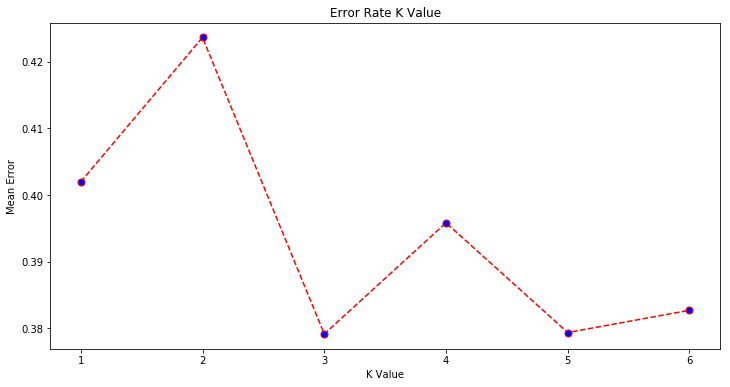

In [34]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=7)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [39]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(n_neighbors=11)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=11)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))

[[ 5114  7386]
 [ 2922 12678]]
              precision    recall  f1-score   support

           0       0.64      0.41      0.50     12500
           1       0.63      0.81      0.71     15600

    accuracy                           0.63     28100
   macro avg       0.63      0.61      0.60     28100
weighted avg       0.63      0.63      0.62     28100

0.6331672597864769


In [44]:
###################################################################################
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=100)
rfc.fit(data_train, targets_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

rfy_pred = rfc.predict(data_test)

print(confusion_matrix(targets_test, rfy_pred))
print(classification_report(targets_test, rfy_pred))
print(accuracy_score(targets_test, rfy_pred))

[[ 2906  9594]
 [  622 14978]]
              precision    recall  f1-score   support

           0       0.82      0.23      0.36     12500
           1       0.61      0.96      0.75     15600

    accuracy                           0.64     28100
   macro avg       0.72      0.60      0.55     28100
weighted avg       0.70      0.64      0.58     28100

0.6364412811387901


In [49]:
#########################################################################################################################
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(data_train, targets_train)

GradientBoostingClassifier(random_state=0)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

gb_pred = gb.predict(data_test)

print(confusion_matrix(targets_test,gb_pred))
print(classification_report(targets_test,gb_pred))
print(accuracy_score(targets_test, gb_pred))

[[ 4061  8439]
 [ 1291 14309]]
              precision    recall  f1-score   support

           0       0.76      0.32      0.45     12500
           1       0.63      0.92      0.75     15600

    accuracy                           0.65     28100
   macro avg       0.69      0.62      0.60     28100
weighted avg       0.69      0.65      0.62     28100

0.6537366548042705


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

gb_pred = rfc.predict(data_train)

print(confusion_matrix(targets_train,gb_pred))
print(classification_report(targets_train,gb_pred))
print(accuracy_score(targets_train, gb_pred))

[[10855 18061]
 [   73 36576]]
              precision    recall  f1-score   support

           0       0.99      0.38      0.54     28916
           1       0.67      1.00      0.80     36649

    accuracy                           0.72     65565
   macro avg       0.83      0.69      0.67     65565
weighted avg       0.81      0.72      0.69     65565

0.7234195073591093


In [ ]:
#gb 65 x 64
#kn 70 x 63
#svm 97 x 70
#rf 72 x 63
